<a href="https://colab.research.google.com/github/F041/Productivity-Italia/blob/main/Produttivit%C3%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Dipendenze


>4 min

In [34]:
install.packages(c("gam"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [35]:
install.packages("BiocManager")
BiocManager::install("graph")

install.packages("ggm")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.16 (BiocManager 1.30.20), R 4.2.3 (2023-03-15)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'graph'”
Old packages: 'bit', 'bslib', 'devtools', 'digest', 'gargle', 'gert',
  'ggplot2', 'highr', 'isoband', 'jsonlite', 'pkgload', 'processx', 'ps',
  'rmarkdown', 'roxygen2', 'stringr', 'tidyverse', 'whisker', 'zip', 'boot',
  'foreign', 'lattice', 'Matrix'

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [36]:
library(ggm)
library(gam)

# Dati

In [55]:
link<-"https://raw.githubusercontent.com/F041/Productivity-Italia/main/Produttivit%C3%A0%20italia%20-%20Principale.csv"
dati<-read.csv(link, dec = ",") #attenzione a dec


In [47]:
head(dati[,1:5])

,Anno,Età.mediana,Produttività,Individuals.using.the.Internet....of.population.,Accesso.computer
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,30.5,0.753,0,0
2,1961,30.8,0.789,0,0
3,1962,31.0,0.822,0,0
4,1963,31.1,0.853,0,0
5,1964,31.3,0.858,0,0
6,1965,31.3,0.896,0,0


piccola pulizia

In [56]:
dati<-dati[1:60,1:5]


In [57]:
dati

,Anno,Età.mediana,Produttività,Individuals.using.the.Internet....of.population.,Accesso.computer
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1960,30.5,0.753,0.000,0.00
2,1961,30.8,0.789,0.000,0.00
3,1962,31.0,0.822,0.000,0.00
4,1963,31.1,0.853,0.000,0.00
5,1964,31.3,0.858,0.000,0.00
6,1965,31.3,0.896,0.000,0.00
7,1966,31.4,0.934,0.000,0.00
8,1967,31.6,0.961,0.000,0.00
9,1968,31.7,1.002,0.000,0.00


# Statistiche descrittive

## Correlazione parziale

In [58]:
parcor(cov(dati))

,Anno,Età.mediana,Produttività,Individuals.using.the.Internet....of.population.,Accesso.computer
Anno,1.0000000,0.9413406,0.8446849,-0.2456785,0.1265291
Età.mediana,0.9413406,1.0000000,-0.6694768,0.1118274,0.1557709
Produttività,0.8446849,-0.6694768,1.0000000,0.1978696,-0.3296088
Individuals.using.the.Internet....of.population.,-0.2456785,0.1118274,0.1978696,1.0000000,0.8212622
Accesso.computer,0.1265291,0.1557709,-0.3296088,0.8212622,1.0000000


Anno lo toglieremo dal modello

## Autocorrelazione parziale

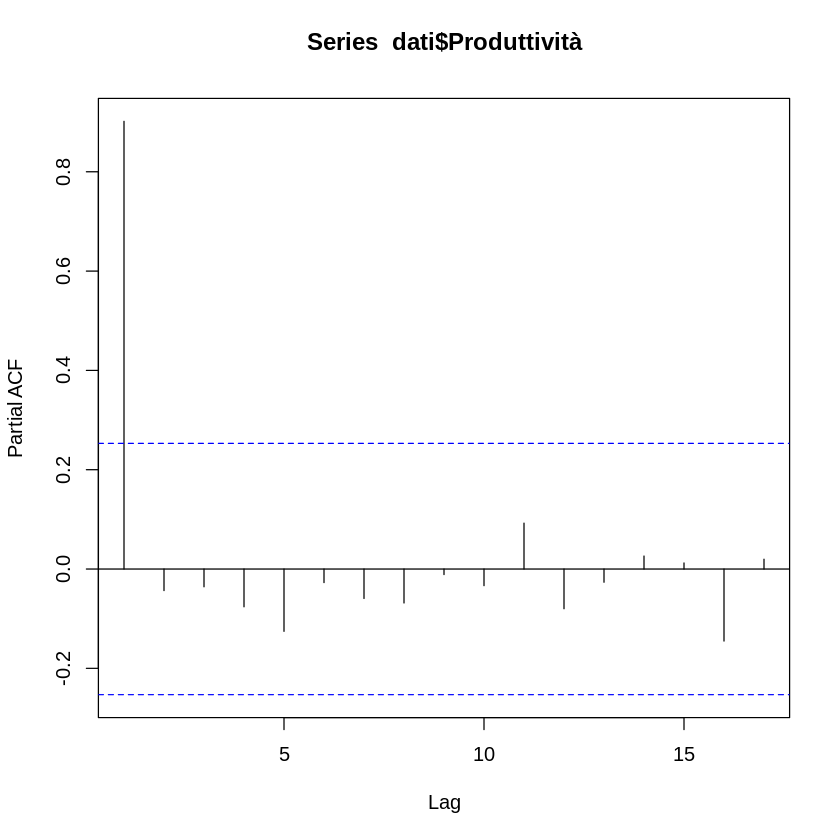

In [61]:
pacf(dati$`Produttività`)

no problema riguardo autocorrelazione variabile obiettivo

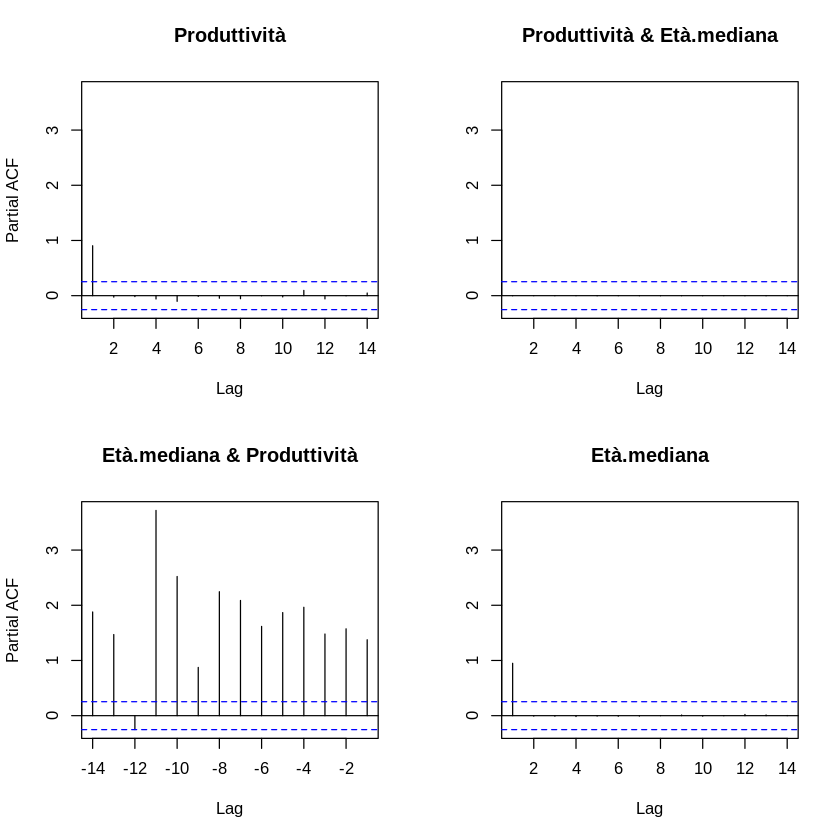

In [89]:
pacf(dati[,c(3,2)])

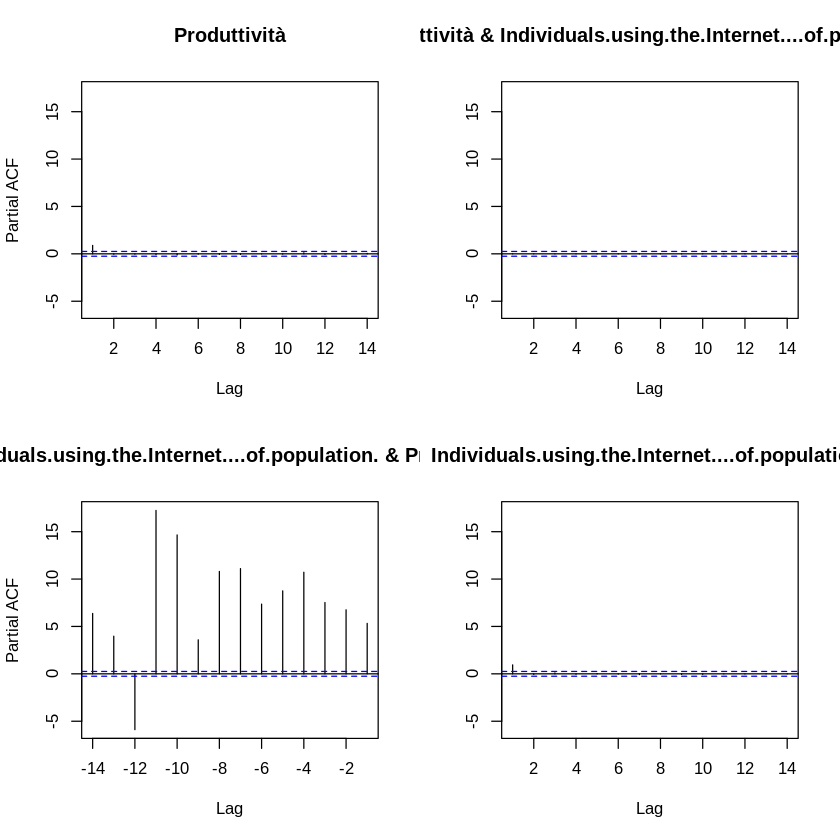

In [90]:
pacf(dati[,c(3,4)])

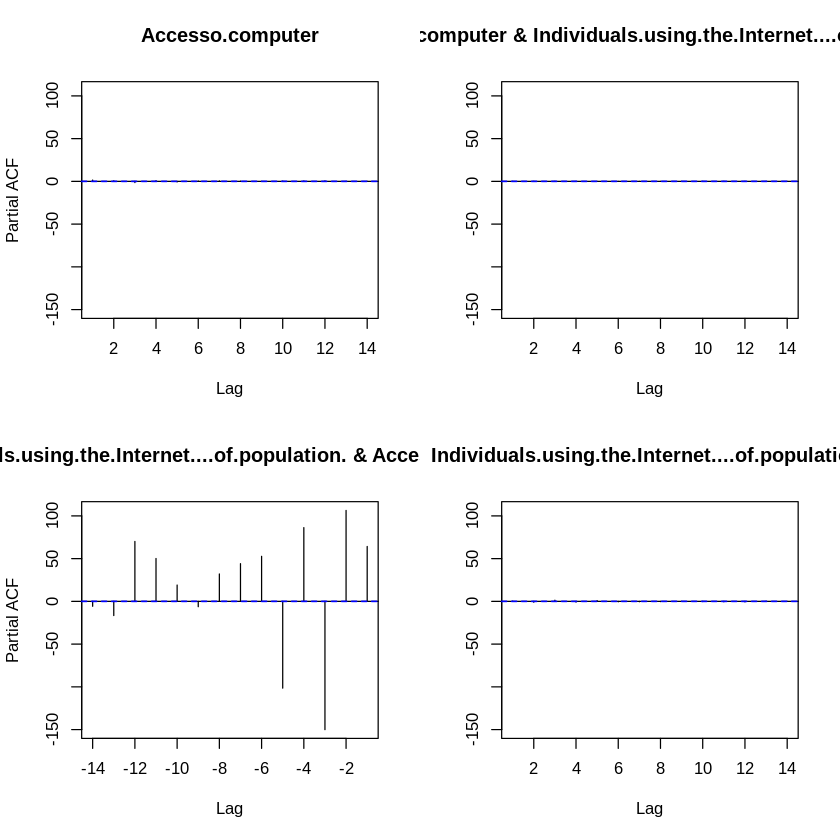

In [91]:
pacf(dati[,c(5,4)])

# Primo modello

In [68]:
lm1<-lm(Produttività ~ Età.mediana+Accesso.computer+Individuals.using.the.Internet....of.population., data=dati)
summary(lm1)


Call:
lm(formula = Produttività ~ Età.mediana + Accesso.computer + 
    Individuals.using.the.Internet....of.population., data = dati)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.187778 -0.047093 -0.003197  0.049156  0.135710 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                      -0.9971199  0.2859527  -3.487
Età.mediana                                       0.0635376  0.0087674   7.247
Accesso.computer                                 -1.0978149  0.3174594  -3.458
Individuals.using.the.Internet....of.population. -0.0003389  0.0024343  -0.139
                                                 Pr(>|t|)    
(Intercept)                                      0.000958 ***
Età.mediana                                      1.35e-09 ***
Accesso.computer                                 0.001046 ** 
Individuals.using.the.Internet....of.population. 0.889774    
---
Signif. codes:  0 ‘***’ 0.

L'intercetta non ha senso, tolgo l'ultima variabile?

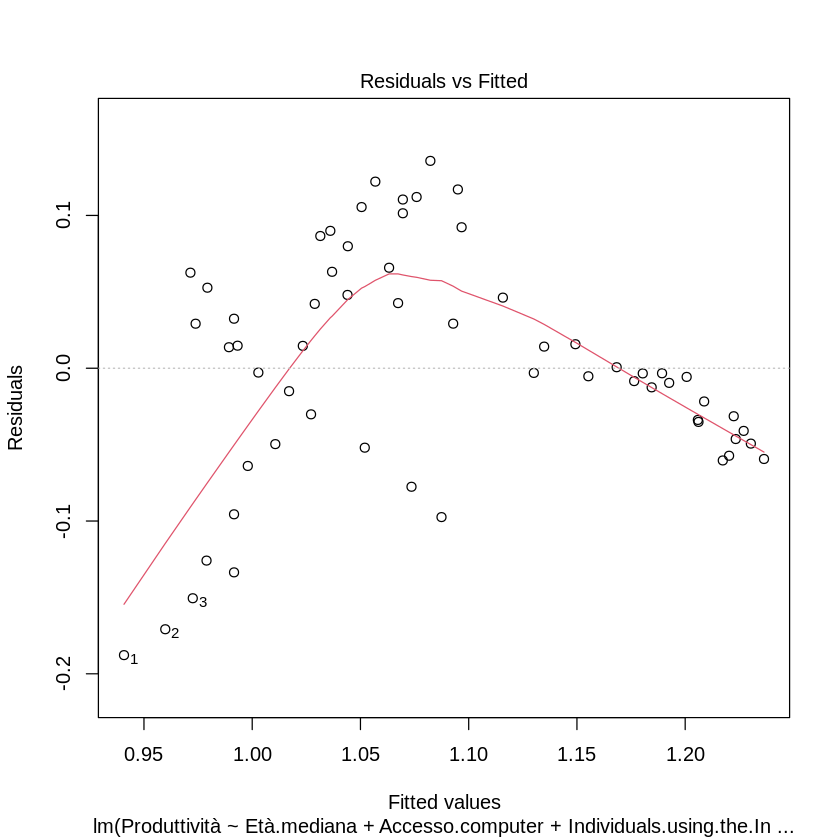

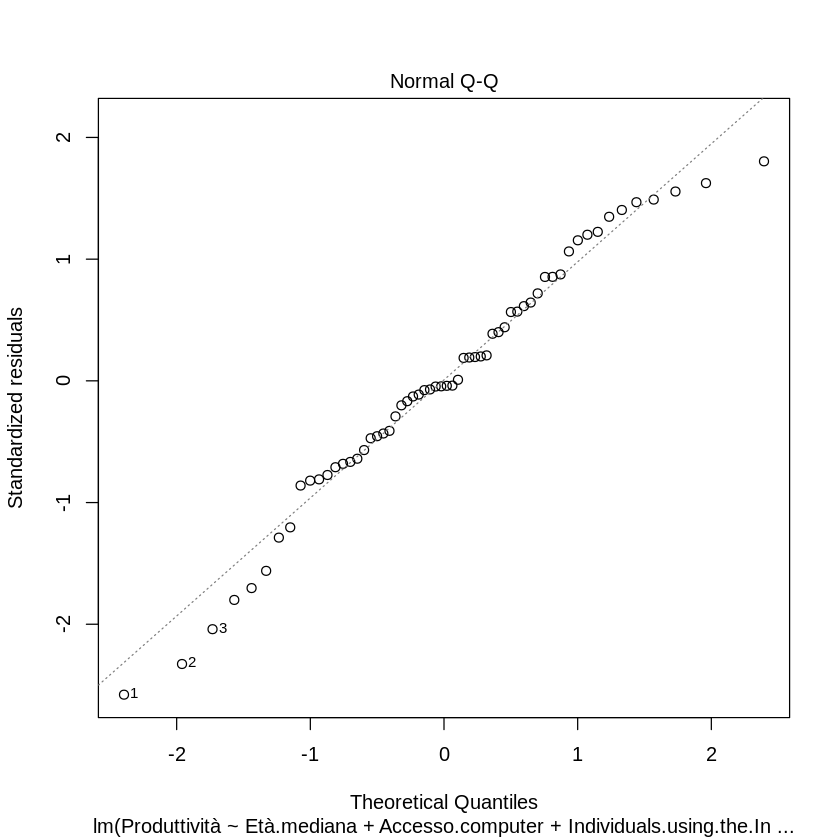

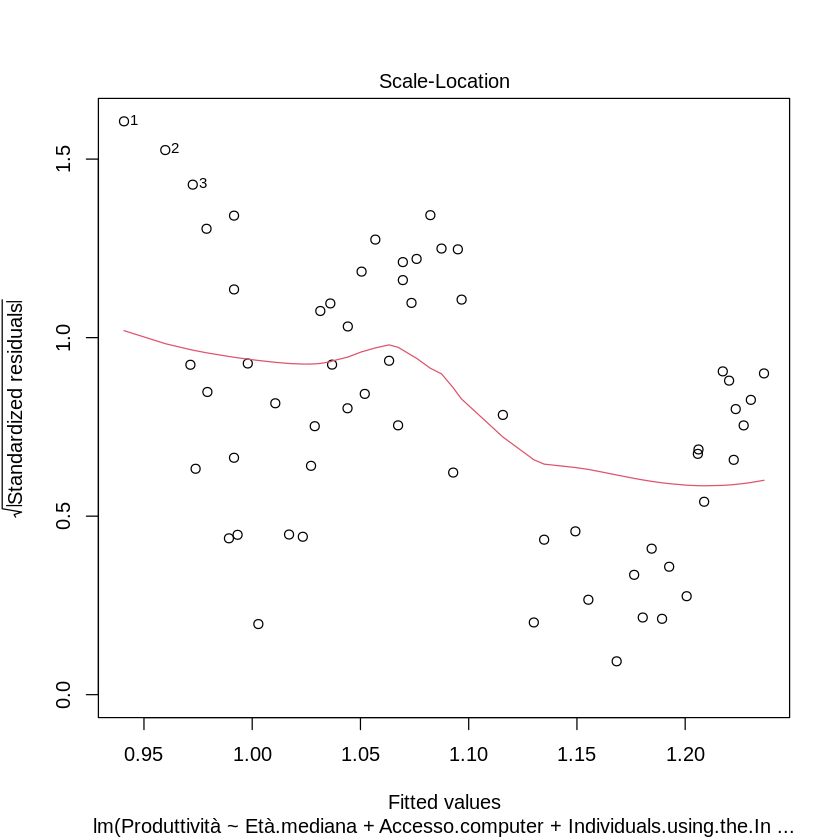

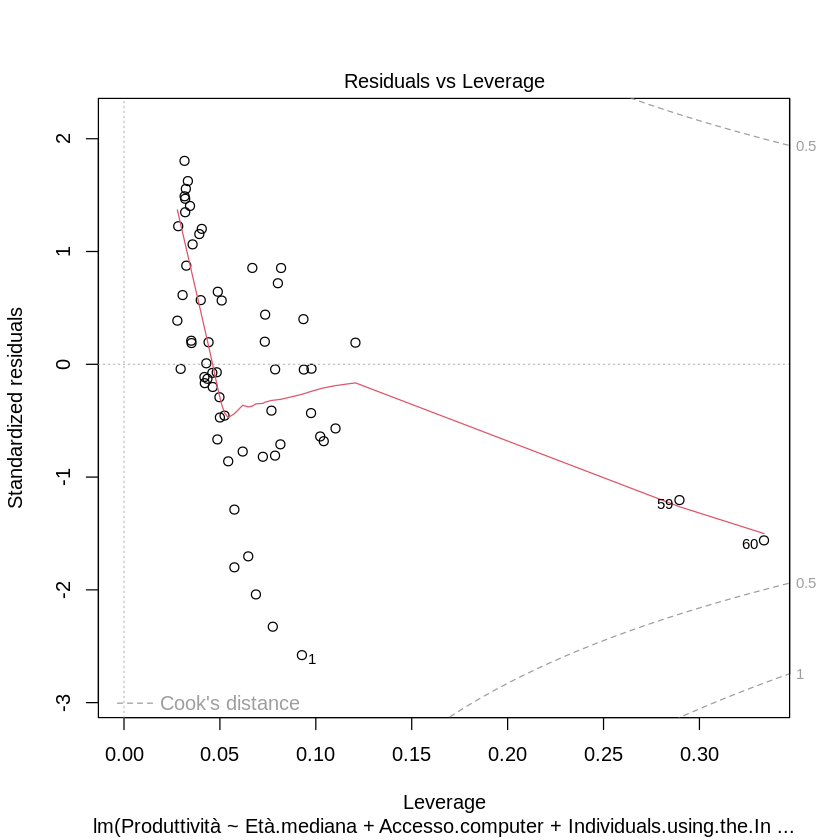

In [96]:
plot(lm1)

Normal Q-Q migliorabile

In [69]:
lm2<-lm(Produttività ~ Età.mediana+Accesso.computer+Individuals.using.the.Internet....of.population.+0, data=dati)
summary(lm2)



Call:
lm(formula = Produttività ~ Età.mediana + Accesso.computer + 
    Individuals.using.the.Internet....of.population. + 0, data = dati)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25366 -0.03020  0.01688  0.04342  0.13432 

Coefficients:
                                                   Estimate Std. Error t value
Età.mediana                                       0.0330053  0.0004879  67.650
Accesso.computer                                 -0.2192281  0.2111836  -1.038
Individuals.using.the.Internet....of.population. -0.0046290  0.0022970  -2.015
                                                 Pr(>|t|)    
Età.mediana                                        <2e-16 ***
Accesso.computer                                   0.3036    
Individuals.using.the.Internet....of.population.   0.0486 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0836 on 57 degrees of freedom
Multiple R-squared:  0.9944,	Adjusted R-squared:  0.

In [ ]:
Coefficiente Età sospetto

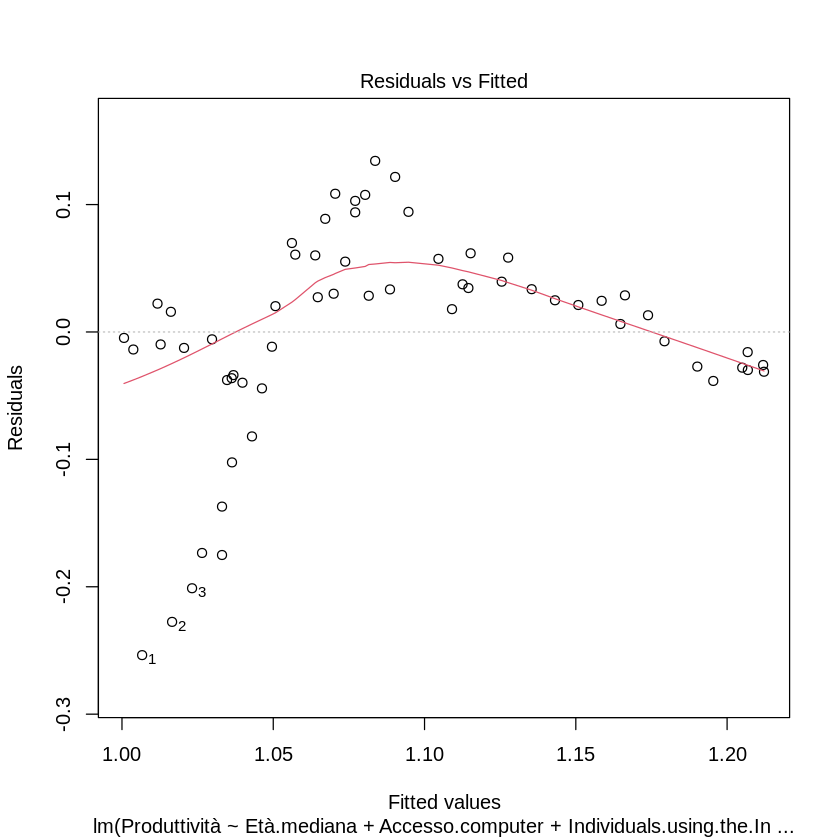

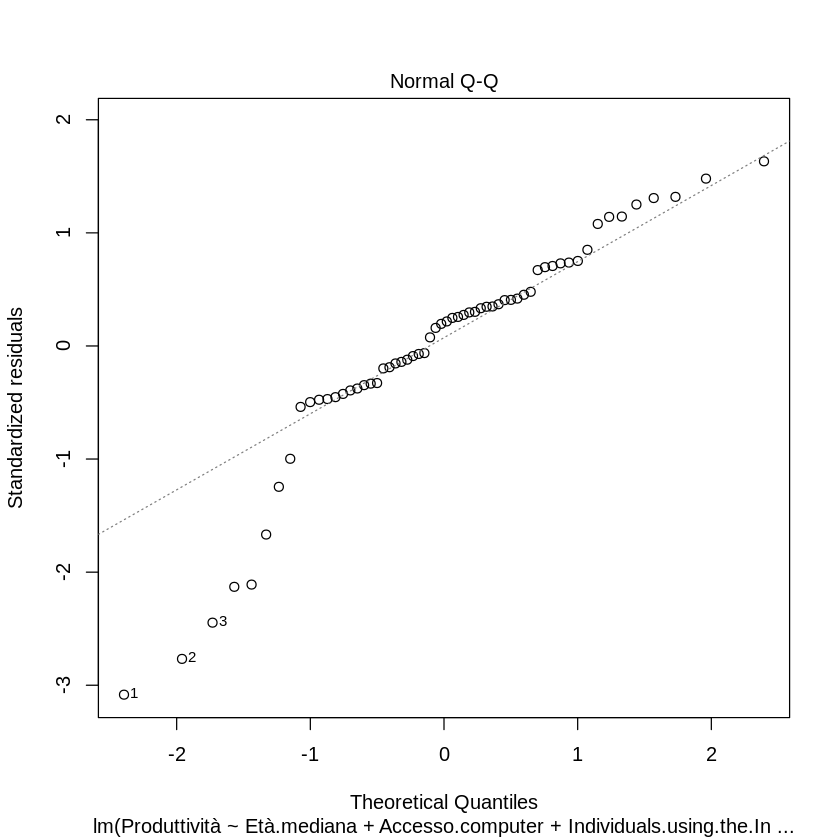

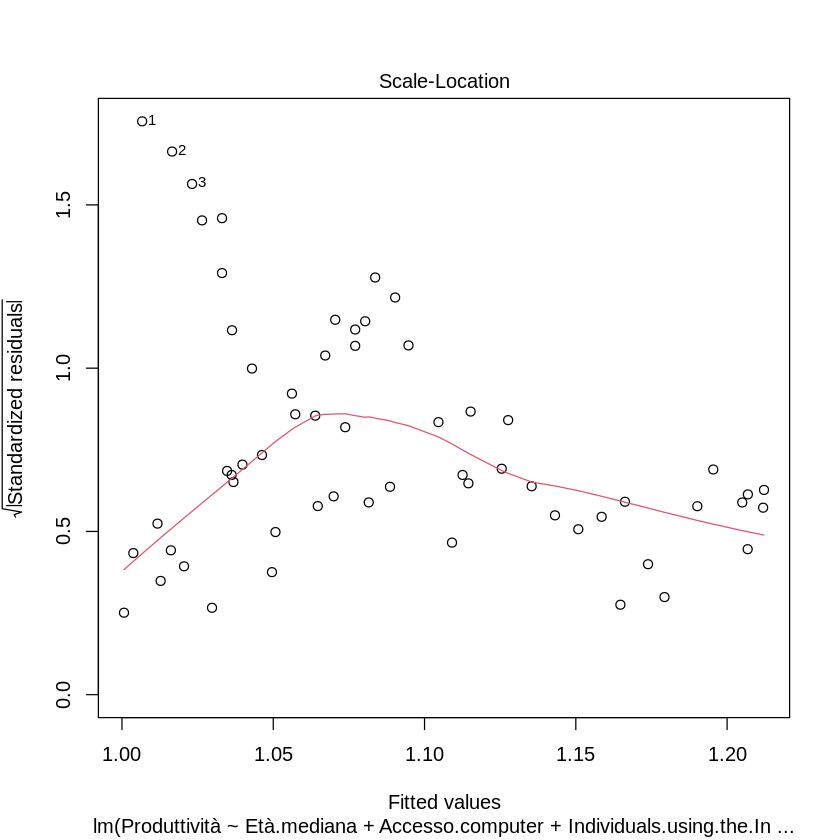

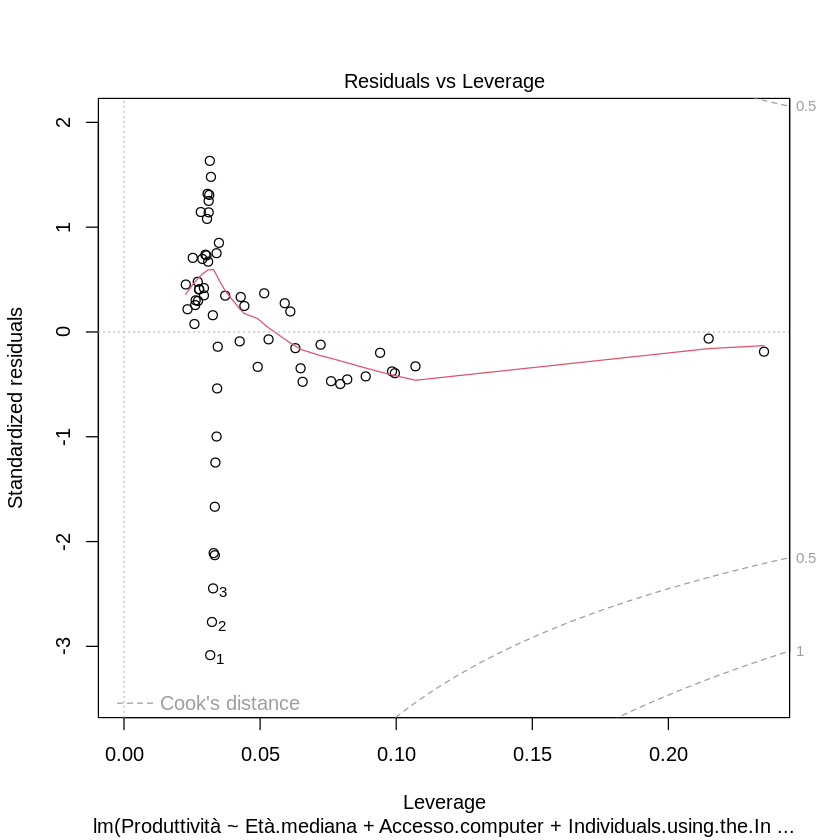

In [86]:
plot(lm2)

dei grafici hanno grossi problemi nonostante R2 quasi a 1

In [73]:
gam1<-gam(Produttività ~ s(Età.mediana)+s(Accesso.computer)+s(Individuals.using.the.Internet....of.population.), data=dati)
summary(gam1)


Call: gam(formula = Produttività ~ s(Età.mediana) + s(Accesso.computer) + 
    s(Individuals.using.the.Internet....of.population.), data = dati)
Deviance Residuals:
      Min        1Q    Median        3Q       Max 
-0.085555 -0.020486 -0.004797  0.020235  0.087976 

(Dispersion Parameter for gaussian family taken to be 0.0022)

    Null Deviance: 0.7854 on 59 degrees of freedom
Residual Deviance: 0.1021 on 46.9998 degrees of freedom
AIC: -184.2901 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                                                    Df  Sum Sq Mean Sq  F value
s(Età.mediana)                                       1 0.00846 0.00846   3.8931
s(Accesso.computer)                                  1 0.41052 0.41052 188.9569
s(Individuals.using.the.Internet....of.population.)  1 0.00495 0.00495   2.2766
Residuals                                           47 0.10211 0.00217         
                                                     Pr(>F)    
s(Età.medi

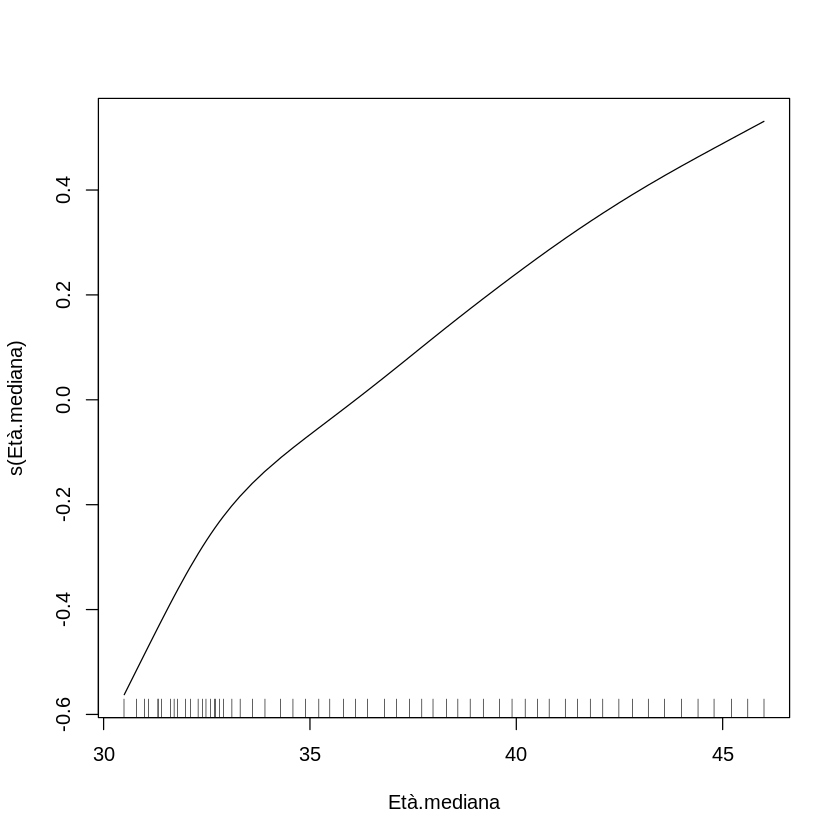

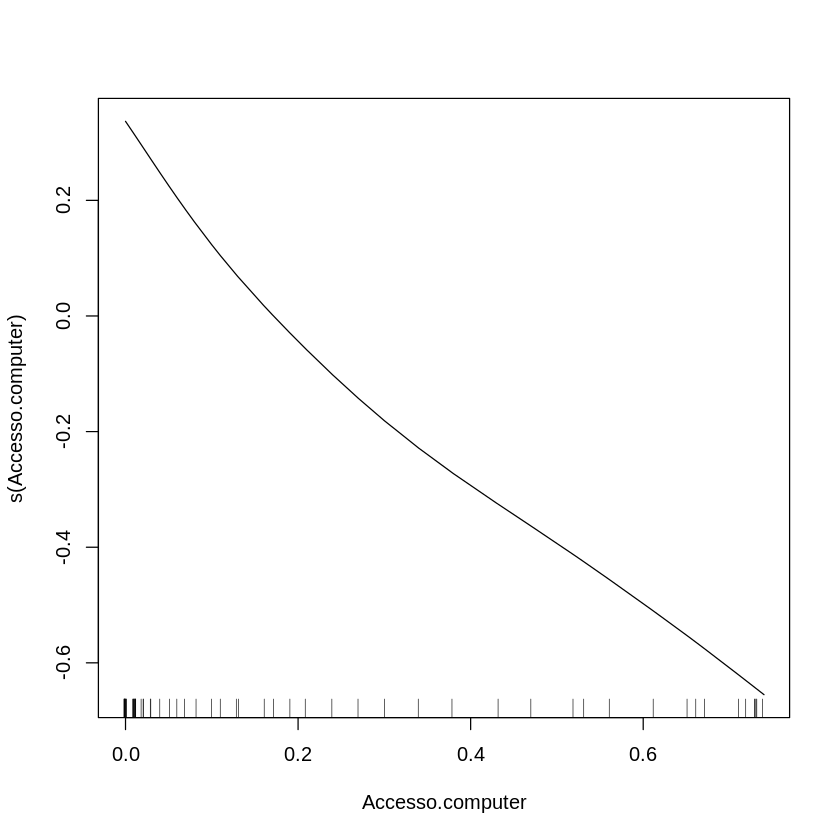

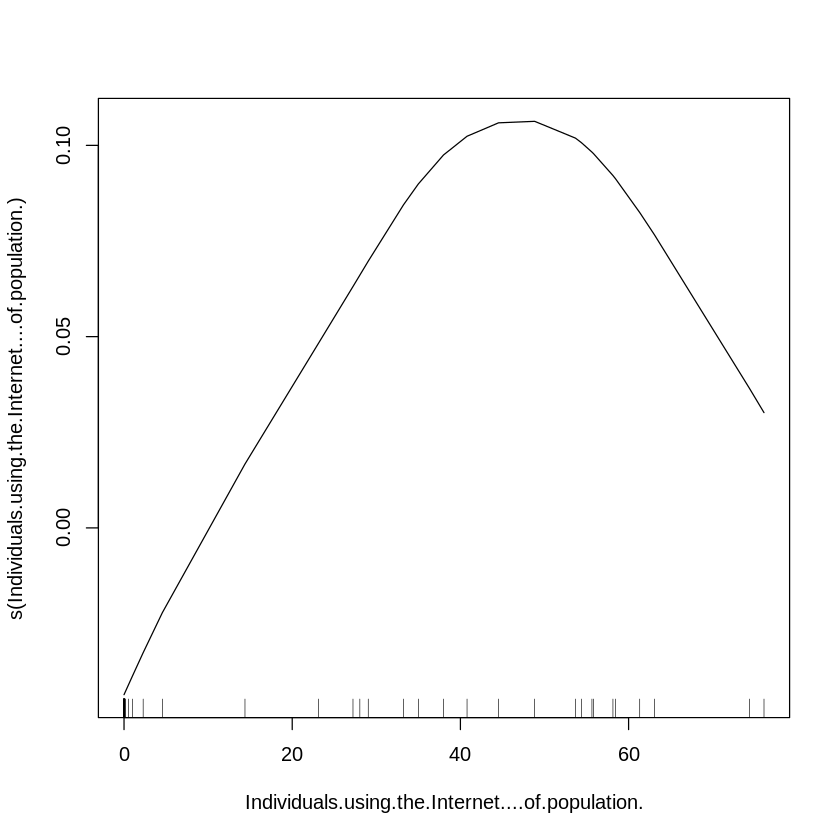

In [74]:
plot(gam1)

# Modello ispirato da GAM

In [78]:
lm3<-lm(Produttività ~ poly(Età.mediana,2)+Individuals.using.the.Internet....of.population., data=dati)
summary(lm3)


Call:
lm(formula = Produttività ~ poly(Età.mediana, 2) + Individuals.using.the.Internet....of.population., 
    data = dati)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18521 -0.03583 -0.01282  0.05186  0.14082 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                       1.116112   0.033950  32.875
poly(Età.mediana, 2)1                             0.334954   0.345454   0.970
poly(Età.mediana, 2)2                            -0.558547   0.153780  -3.632
Individuals.using.the.Internet....of.population. -0.001755   0.001986  -0.884
                                                 Pr(>|t|)    
(Intercept)                                       < 2e-16 ***
poly(Età.mediana, 2)1                            0.336414    
poly(Età.mediana, 2)2                            0.000611 ***
Individuals.using.the.Internet....of.population. 0.380657    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.

In [82]:
lm4<-lm(Produttività ~ poly(Età.mediana,2)*Accesso.computer, data=dati)
summary(lm4)


Call:
lm(formula = Produttività ~ poly(Età.mediana, 2) * Accesso.computer, 
    data = dati)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09038 -0.04525 -0.00755  0.03701  0.10243 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                              0.9414     0.1781   5.287 2.30e-06 ***
poly(Età.mediana, 2)1                   -1.7058     1.4523  -1.175    0.245    
poly(Età.mediana, 2)2                   -1.8806     0.3843  -4.893 9.35e-06 ***
Accesso.computer                         0.2839     1.6423   0.173    0.863    
poly(Età.mediana, 2)1:Accesso.computer   2.0200     6.5730   0.307    0.760    
poly(Età.mediana, 2)2:Accesso.computer   1.9601     2.6560   0.738    0.464    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05681 on 54 degrees of freedom
Multiple R-squared:  0.7781,	Adjusted R-squared:  0.7576 
F-statistic: 37.87 on 5 and 54 DF,  p-value

interazione inutile

In [95]:
lm5<-lm(Produttività ~ poly(Età.mediana,2)+poly(Individuals.using.the.Internet....of.population.,2), data=dati)
summary(lm5)


Call:
lm(formula = Produttività ~ poly(Età.mediana, 2) + poly(Individuals.using.the.Internet....of.population., 
    2), data = dati)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.129905 -0.041616 -0.003323  0.041926  0.120626 

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                 1.087383   0.008596
poly(Età.mediana, 2)1                                      -0.684543   0.389218
poly(Età.mediana, 2)2                                      -1.245961   0.212691
poly(Individuals.using.the.Internet....of.population., 2)1  0.848450   0.430011
poly(Individuals.using.the.Internet....of.population., 2)2  0.454998   0.108712
                                                           t value Pr(>|t|)    
(Intercept)                                                126.500  < 2e-16 ***
poly(Età.mediana, 2)1                                       -1.759 0.084180 .  
poly(Età.mediana

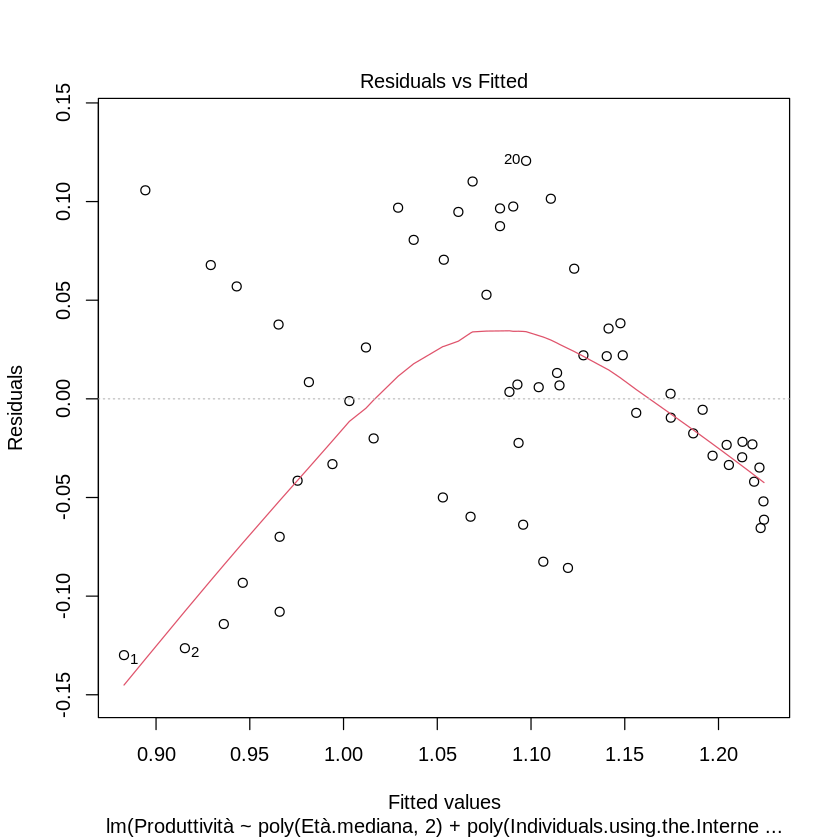

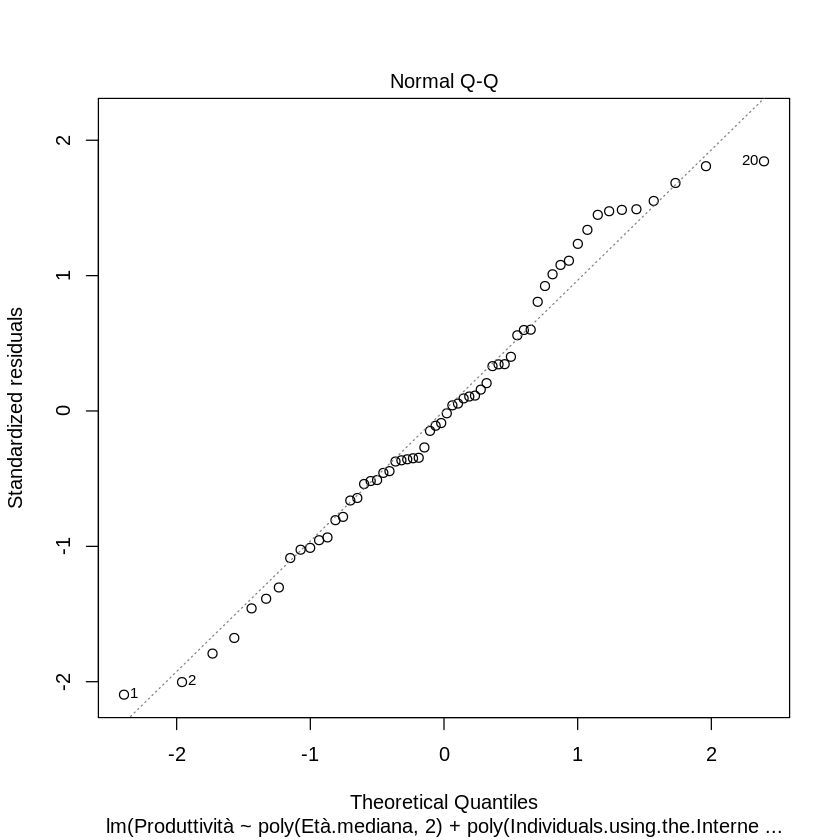

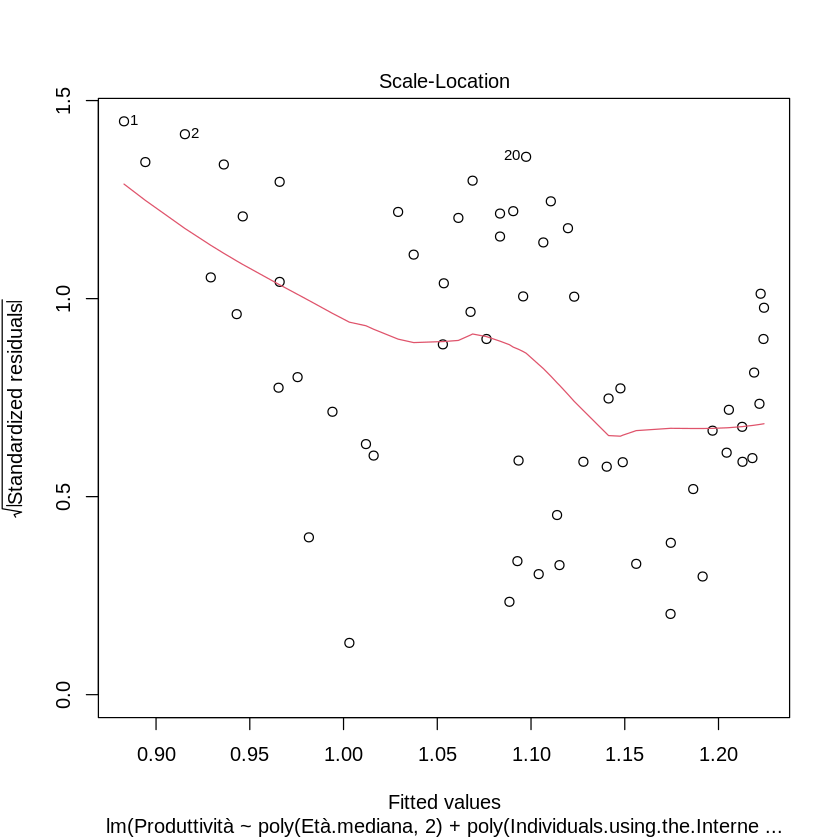

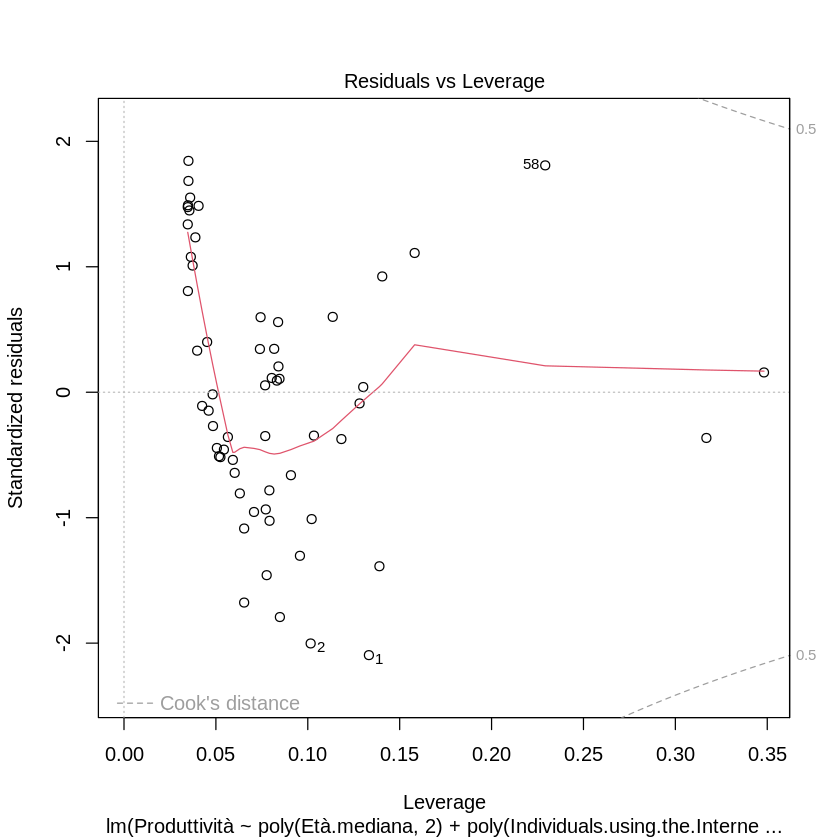

In [93]:
plot(lm5)

Si potrebbe migliorare, ad esempio trasformando la Y. Tuttavia la trasformata sull'accesso ad internet risulta un artificio, perché "cattura" gli effetti della produttività causata dall'ultima recessione